In [132]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib import style
import matplotlib.mlab as mlab


from collections import defaultdict
from scipy.stats.stats import pearsonr

style.use("seaborn-pastel")
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.grid'] = True

Load dataset
===============

In [2]:
cc = pd.read_csv("../dataset/credit_default_train.csv")
cc.head()

,limit,sex,education,status,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,...,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,credit_default
0,50000,male,graduate school,NaN,25,2,0,0,0,0,...,49535,30358,30302,2130,1905,1811,1100,1100,1200,no
1,200000,male,university,married,54,-1,-1,-1,-1,-1,...,6335,4616,7956,10120,7852,6336,4622,7956,5499,no
2,30000,female,high school,married,-1,2,3,2,2,2,...,30496,29731,29047,0,1700,1100,3,1053,1303,no
3,140000,female,university,single,-1,0,0,0,0,0,...,25224,26855,23783,2000,2000,900,2000,10000,5000,no
4,60000,female,high school,married,36,1,2,2,0,0,...,48738,49601,52773,1788,0,1894,1801,3997,0,yes


In [3]:
cc.shape[0]

10000

In [4]:
cc.describe()

,limit,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,ps-apr,ba-sep,ba-aug,ba-jul,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,167197.000000,32.020200,-0.004000,-0.127800,-0.175700,-0.234300,-0.263700,-0.297400,51490.704100,49239.438400,46957.46680,43306.114300,40182.130200,38621.582700,5651.344900,5.973676e+03,5131.898600,4719.769200,4734.702900,5480.147400
std,128975.488596,13.843119,1.132834,1.200921,1.193554,1.169333,1.147386,1.147295,73740.383345,70777.470286,68948.62697,64519.910263,60732.330157,59325.339137,15835.839092,2.251175e+04,15416.402957,14483.407778,14912.375475,19361.411204
min,10000.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,-69777.000000,-61506.00000,-24303.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,26.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3545.250000,2899.250000,2442.50000,2203.250000,1650.000000,1150.000000,997.000000,7.800000e+02,390.000000,261.500000,200.000000,100.000000
50%,140000.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22246.000000,21202.000000,19905.50000,19072.000000,18071.000000,16977.000000,2081.500000,2.000000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67681.000000,64412.750000,60164.75000,54093.750000,49906.500000,48680.750000,5019.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000
max,780000.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,613860.000000,605943.000000,597415.00000,616836.000000,587067.000000,568638.000000,493358.000000,1.227082e+06,417588.000000,292962.000000,417990.000000,528666.000000


In [5]:
cc.isnull().sum()

limit                0
sex                100
education          127
status            1822
age                  0
ps-sep               0
ps-aug               0
ps-jul               0
ps-jun               0
ps-may               0
ps-apr               0
ba-sep               0
ba-aug               0
ba-jul               0
ba-jun               0
ba-may               0
ba-apr               0
pa-sep               0
pa-aug               0
pa-jul               0
pa-jun               0
pa-may               0
pa-apr               0
credit_default       0
dtype: int64

Data understanding
===============

Credit default
--------------------

In [6]:
cc['credit_default'].describe()

count     10000
unique        2
top          no
freq       7788
Name: credit_default, dtype: object

In [7]:
cc['credit_default'].unique()

array(['no', 'yes'], dtype=object)

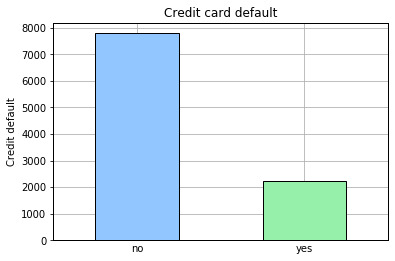

In [88]:
cc['credit_default'].value_counts().plot(kind='bar', title='Credit card default', edgecolor='black')
plt.ylabel('Credit default')
plt.xticks(rotation=0)
plt.show()

Sex
--------

In [9]:
cc['sex'].describe()

count       9900
unique         2
top       female
freq        6032
Name: sex, dtype: object

In [10]:
cc['sex'].value_counts()

female    6032
male      3868
Name: sex, dtype: int64

In [11]:
cc['sex'].unique()

array(['male', 'female', nan], dtype=object)

In [12]:
cc.isnull().sum()['sex']

100

In [13]:
sex_default = pd.crosstab(cc['sex'], cc['credit_default'])
sex_default

credit_default,no,yes
sex,,
female,4803,1229
male,2904,964


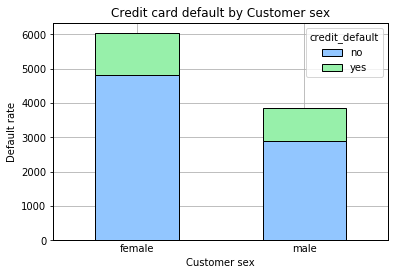

In [87]:
sex_default.plot(kind='bar', stacked=True, title='Credit card default by Customer sex', edgecolor='black')
plt.xlabel('Customer sex')
plt.ylabel('Default rate')
plt.xticks(rotation=0)
plt.show()

In [15]:
sex_default_norm = sex_default.div(sex_default.sum(1).astype(float), axis=0)
sex_default_norm

credit_default,no,yes
sex,,
female,0.796253,0.203747
male,0.750776,0.249224


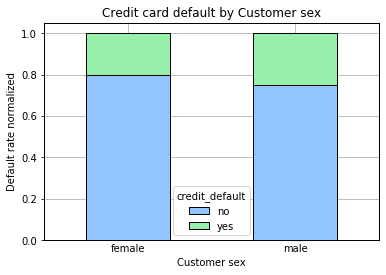

In [89]:
sex_default_norm.plot(kind='bar', stacked=True, title='Credit card default by Customer sex', edgecolor='black')
plt.xlabel('Customer sex')
plt.ylabel('Default rate normalized')
plt.xticks(rotation=0)
plt.show()

Education
--------

In [17]:
cc['education'].describe()

count           9873
unique             4
top       university
freq            4685
Name: education, dtype: object

In [77]:
cc['education'].value_counts()

university         4685
graduate school    3480
high school        1672
others               36
Name: education, dtype: int64

In [19]:
cc.isnull().sum()['education']

127

In [20]:
education_default = pd.crosstab(cc['education'], cc['credit_default'])
education_default

credit_default,no,yes
education,,
graduate school,2813,667
high school,1286,386
others,34,2
university,3534,1151


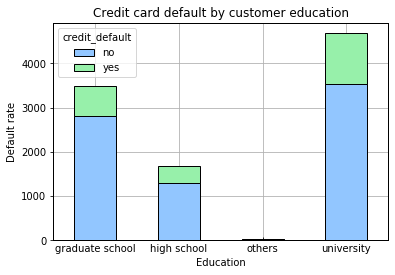

In [90]:
education_default.plot(kind='bar', stacked=True, title='Credit card default by customer education', edgecolor='black')
plt.xlabel('Education')
plt.ylabel('Default rate')
plt.xticks(rotation=0)
plt.show()

In [22]:
education_default_norm = education_default.div(education_default.sum(1).astype(float), axis=0)
education_default_norm

credit_default,no,yes
education,,
graduate school,0.808333,0.191667
high school,0.769139,0.230861
others,0.944444,0.055556
university,0.754322,0.245678


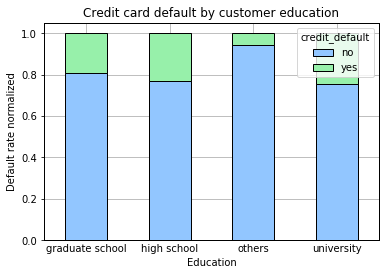

In [91]:
education_default_norm.plot(kind='bar', stacked=True, title='Credit card default by customer education', edgecolor='black')
plt.xlabel('Education')
plt.ylabel('Default rate normalized')
plt.xticks(rotation=0)
plt.show()

Status
--------

In [24]:
cc['status'].describe()

count       8178
unique         3
top       single
freq        4346
Name: status, dtype: object

In [118]:
cc['status'].value_counts()

single     4346
married    3757
others       75
Name: status, dtype: int64

In [26]:
cc.isnull().sum()['status']

1822

In [27]:
status_default = pd.crosstab(cc['status'], cc['credit_default'])
status_default

credit_default,no,yes
status,,
married,2888,869
others,50,25
single,3458,888


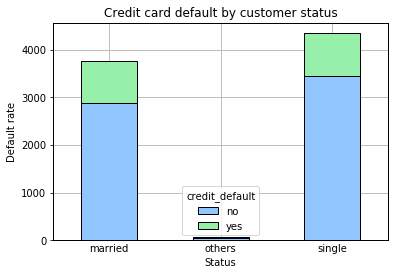

In [92]:
status_default.plot(kind='bar', stacked=True, title='Credit card default by customer status', edgecolor='black')
plt.xlabel('Status')
plt.ylabel('Default rate')
plt.xticks(rotation=0)
plt.show()

In [29]:
status_default_norm = status_default.div(status_default.sum(1).astype(float), axis=0)
status_default_norm

credit_default,no,yes
status,,
married,0.768698,0.231302
others,0.666667,0.333333
single,0.795674,0.204326


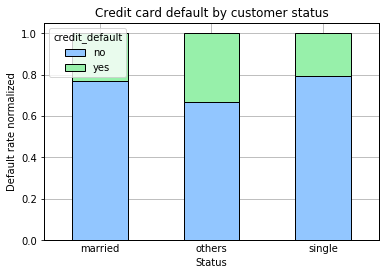

In [93]:
status_default_norm.plot(kind='bar', stacked=True, title='Credit card default by customer status', edgecolor='black')
plt.xlabel('Status')
plt.ylabel('Default rate normalized')
plt.xticks(rotation=0)
plt.show()

Age
--------

In [31]:
ages = cc['age'].copy()
ages.describe()

count    10000.000000
mean        32.020200
std         13.843119
min         -1.000000
25%         26.000000
50%         33.000000
75%         40.000000
max         75.000000
Name: age, dtype: float64

In [32]:
ages_unique = ages.unique()
ages_unique.sort()
ages_unique

array([-1, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 75])

In [33]:
len(ages_unique)

55

In [34]:
ages_invalid = cc[cc['age']==-1]
ages_invalid.shape[0]

951

In [35]:
ages_valid = cc[cc['age']>0]
ages_valid.shape[0]

9049

In [36]:
ages_valid['age'].describe()

count    9049.000000
mean       35.490441
std         9.226539
min        21.000000
25%        28.000000
50%        34.000000
75%        41.000000
max        75.000000
Name: age, dtype: float64

In [136]:
ages_default = pd.crosstab(ages_valid['age']//5*5, ages_valid['credit_default'])
ages_default

credit_default,no,yes
age,,
20,562,234
25,1664,445
30,1491,332
35,1233,323
40,934,257
45,585,175
50,363,136
55,165,48
60,43,22


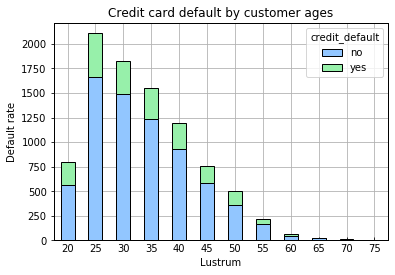

In [167]:

fig = plt.figure()
ax1 = fig.add_subplot(111)

ages_default.plot(ax=ax1, kind='bar', stacked=True, title='Credit card default by customer ages', edgecolor='black', )

ax2 = fig.add_subplot(111)

from scipy.stats import norm

# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(20, 75, 0.001)
# Mean = 0, SD = 2.
ax2.plot(x_axis, norm.pdf(x_axis,35.5,9), zorder=2)

plt.xlabel('Lustrum')
plt.ylabel('Default rate')
plt.xticks(rotation=0)

plt.show()


In [168]:
ages_default_norm = ages_default.div(ages_default.sum(1).astype(float), axis=0)
ages_default_norm

credit_default,no,yes
age,,
20,0.706030,0.293970
25,0.789000,0.211000
30,0.817883,0.182117
35,0.792416,0.207584
40,0.784215,0.215785
45,0.769737,0.230263
50,0.727455,0.272545
55,0.774648,0.225352
60,0.661538,0.338462


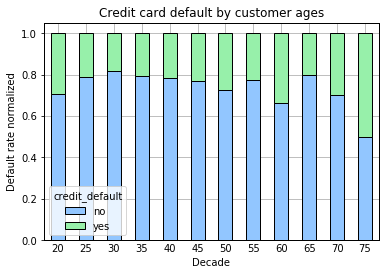

In [169]:
ages_default_norm.plot(kind='bar', stacked=True, title='Credit card default by customer ages', edgecolor='black')
plt.xlabel('Decade')
plt.ylabel('Default rate normalized')
plt.xticks(rotation=0)
plt.show()

Limit
--------

In [41]:
limits = cc['limit'].copy()
limits.describe()

count     10000.000000
mean     167197.000000
std      128975.488596
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      780000.000000
Name: limit, dtype: float64

In [42]:
limits_unique = limits.unique()
limits_unique.sort()
limits_unique

array([ 10000,  20000,  30000,  40000,  50000,  60000,  70000,  80000,
        90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000,
       170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000,
       250000, 260000, 270000, 280000, 290000, 300000, 310000, 320000,
       330000, 340000, 350000, 360000, 370000, 380000, 390000, 400000,
       410000, 420000, 430000, 440000, 450000, 460000, 470000, 480000,
       490000, 500000, 510000, 520000, 530000, 540000, 550000, 560000,
       570000, 580000, 590000, 600000, 610000, 620000, 630000, 640000,
       650000, 660000, 680000, 700000, 710000, 740000, 750000, 780000])

In [43]:
len(limits_unique)

72

In [180]:
limits_default = pd.crosstab(cc['limit']//50000*50000, cc['credit_default'])
limits_default

credit_default,no,yes
limit,,
0,878,545
50000,1754,633
100000,1014,289
150000,969,211
200000,1126,236
250000,571,89
300000,434,56
350000,426,75
400000,210,30


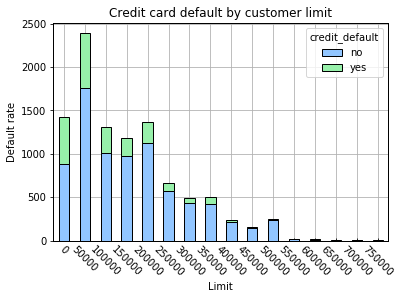

In [181]:
limits_default.plot(kind='bar', stacked=True, title='Credit card default by customer limit', edgecolor='black')
plt.xlabel('Limit')
plt.ylabel('Default rate')
plt.xticks(rotation=-45)
plt.show()

In [182]:
limits_default_norm = limits_default.div(limits_default.sum(1).astype(float), axis=0)
limits_default_norm

credit_default,no,yes
limit,,
0,0.617006,0.382994
50000,0.734814,0.265186
100000,0.778204,0.221796
150000,0.821186,0.178814
200000,0.826725,0.173275
250000,0.865152,0.134848
300000,0.885714,0.114286
350000,0.850299,0.149701
400000,0.875000,0.125000


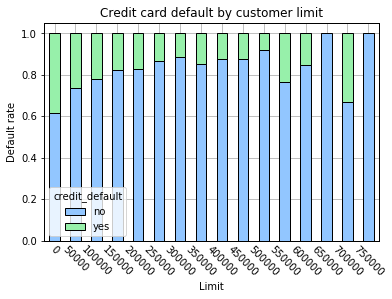

In [183]:
limits_default_norm.plot(kind='bar', stacked=True, title='Credit card default by customer limit', edgecolor='black')
plt.xlabel('Limit')
plt.ylabel('Default rate')
plt.xticks(rotation=-45)
plt.show()

Payment status
--------

In [48]:
ps_var = ['ps-apr', 'ps-may', 'ps-jun', 'ps-jul', 'ps-aug', 'ps-sep']
cc[ps_var].describe()

,ps-apr,ps-may,ps-jun,ps-jul,ps-aug,ps-sep
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.297400,-0.263700,-0.234300,-0.175700,-0.127800,-0.004000
std,1.147295,1.147386,1.169333,1.193554,1.200921,1.132834
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000


In [49]:
ps_unique = []
for m in ps_var:
    val = cc[m].unique()
    val.sort()
    ps_unique.append(val)
ps_unique

[array([-2, -1,  0,  2,  3,  4,  5,  6,  7,  8]),
 array([-2, -1,  0,  2,  3,  4,  5,  6,  7,  8]),
 array([-2, -1,  0,  2,  3,  4,  5,  6,  7,  8]),
 array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8]),
 array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7]),
 array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8])]

In [191]:
cc[ps_var[0]].value_counts()

 0    5450
-1    1915
-2    1636
 2     900
 3      57
 7      19
 4      14
 6       5
 5       3
 8       1
Name: ps-apr, dtype: int64

In [51]:
ps_default = []

for m in ps_var:
    ps_default.append(pd.crosstab(cc[m], cc['credit_default']))
    
ps_default[0]

credit_default,no,yes
ps-apr,,
-2,1323,313
-1,1583,332
0,4421,1029
2,437,463
3,16,41
4,3,11
5,1,2
6,0,5
7,4,15


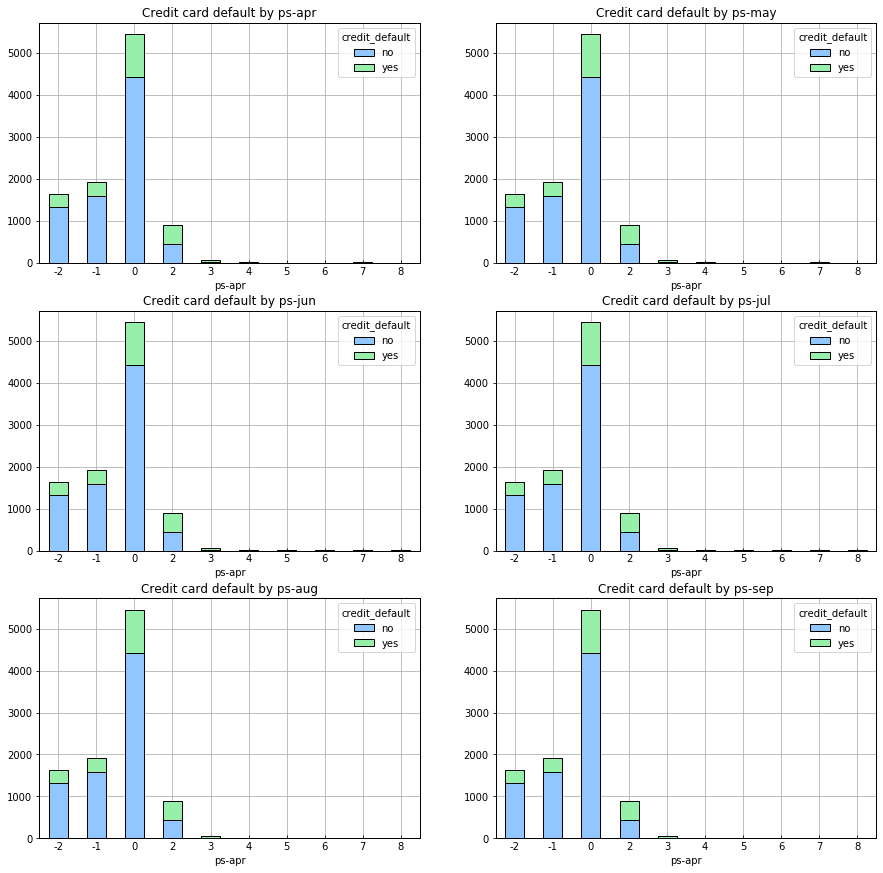

In [109]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

for i in range(0, len(ps_var)):
    x = i // fig_dims[1]
    y = i % fig_dims[1]
    sp = plt.subplot2grid(fig_dims, (x, y))
    ps_default[0].plot(ax=sp, kind='bar', stacked=True, title='Credit card default by ' + ps_var[i], edgecolor='black')
    plt.xticks(rotation=0)
    
plt.show()

In [53]:
ps_default_norm = []

for i in range(0, len(ps_var)):
    ps_default_norm.append( ps_default[i].div(ps_default[i].sum(1).astype(float), axis=0) )
    
ps_default_norm[1]

credit_default,no,yes
ps-may,,
-2,0.813316,0.186684
-1,0.833968,0.166032
0,0.811623,0.188377
2,0.462838,0.537162
3,0.327586,0.672414
4,0.222222,0.777778
5,0.400000,0.600000
6,0.500000,0.500000
7,0.173913,0.826087


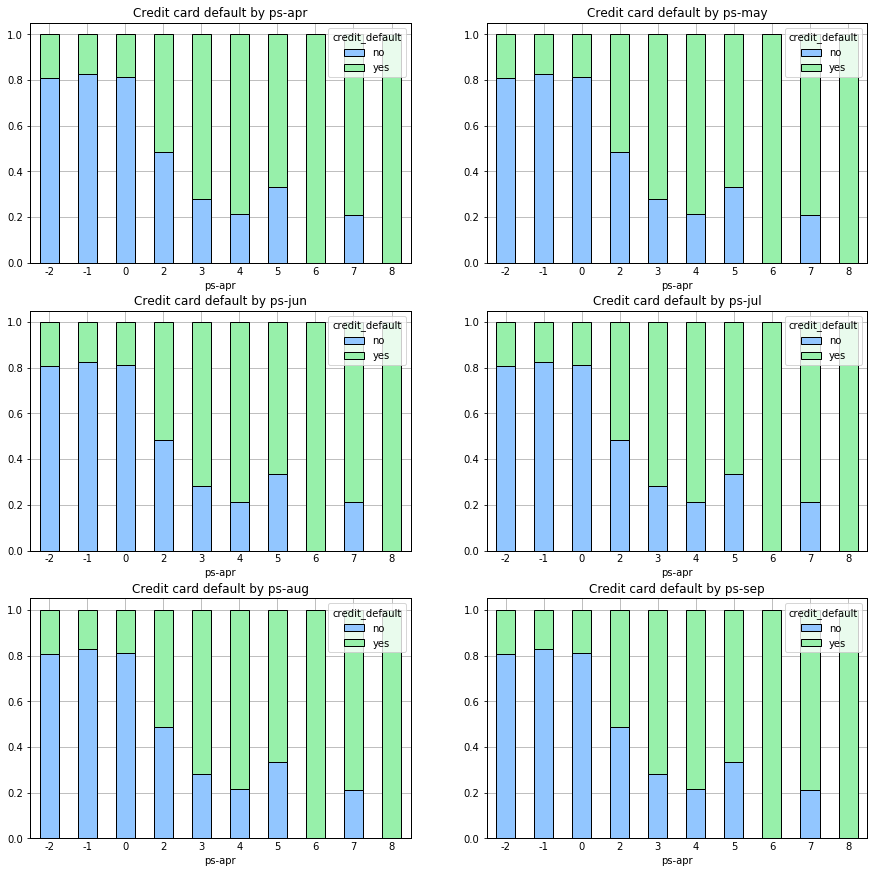

In [108]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

for i in range(0, len(ps_var)):
    x = i // fig_dims[1]
    y = i % fig_dims[1]
    sp = plt.subplot2grid(fig_dims, (x, y))
    ps_default_norm[0].plot(ax=sp, kind='bar', stacked=True, title='Credit card default by ' + ps_var[i], edgecolor='black')
    plt.xticks(rotation=0)

plt.show()

Bill Amount
--------

In [55]:
ba_var = ['ba-apr', 'ba-may', 'ba-jun', 'ba-jul', 'ba-aug', 'ba-sep']
cc[ba_var].describe()

,ba-apr,ba-may,ba-jun,ba-jul,ba-aug,ba-sep
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,38621.582700,40182.130200,43306.114300,46957.46680,49239.438400,51490.704100
std,59325.339137,60732.330157,64519.910263,68948.62697,70777.470286,73740.383345
min,-209051.000000,-81334.000000,-24303.000000,-61506.00000,-69777.000000,-14386.000000
25%,1150.000000,1650.000000,2203.250000,2442.50000,2899.250000,3545.250000
50%,16977.000000,18071.000000,19072.000000,19905.50000,21202.000000,22246.000000
75%,48680.750000,49906.500000,54093.750000,60164.75000,64412.750000,67681.000000
max,568638.000000,587067.000000,616836.000000,597415.00000,605943.000000,613860.000000


In [56]:
ba_unique = []
for m in ba_var:
    val = cc[m].unique()
    val.sort()
    ba_unique.append([min(val), max(val)])
ba_unique

[[-209051, 568638],
 [-81334, 587067],
 [-24303, 616836],
 [-61506, 597415],
 [-69777, 605943],
 [-14386, 613860]]

In [57]:
cc.isnull().sum()[ba_var]

ba-apr    0
ba-may    0
ba-jun    0
ba-jul    0
ba-aug    0
ba-sep    0
dtype: int64

In [192]:
ba_default = []

for m in ba_var:
    ba_default.append(pd.crosstab(cc[m]//50000*50000, cc['credit_default']))
    
ba_default[0]

credit_default,no,yes
ba-apr,,
-250000,1,0
-200000,1,0
-100000,1,0
-50000,179,43
0,5688,1691
50000,973,248
100000,480,126
150000,247,50
200000,103,22


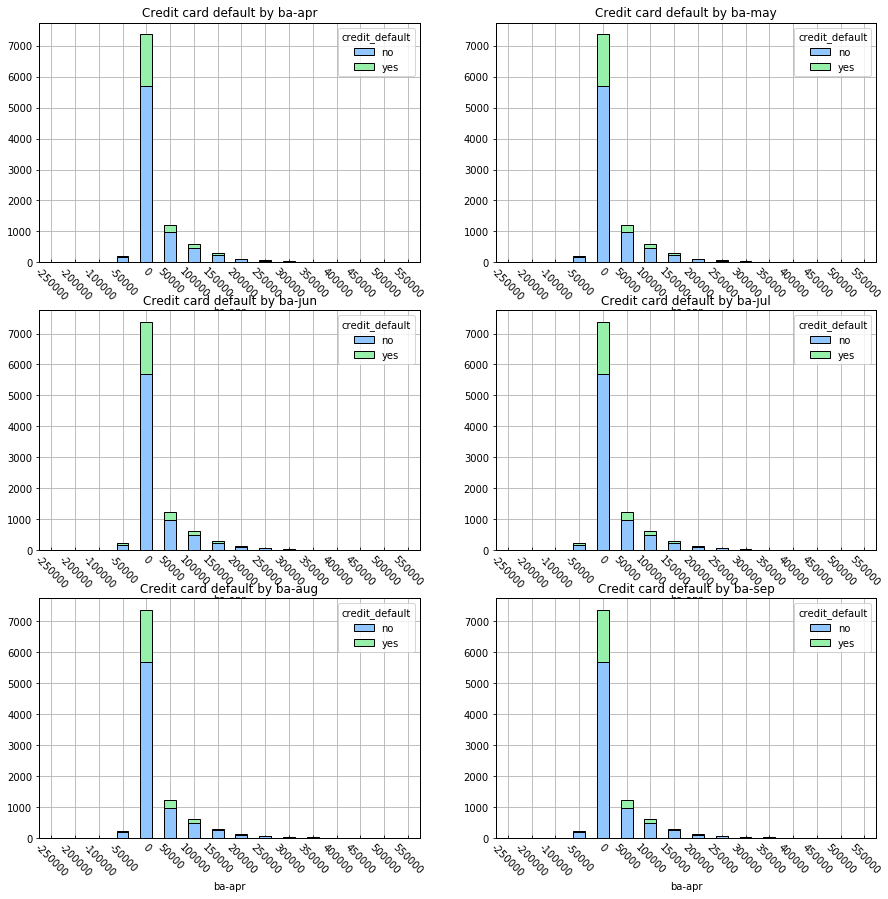

In [193]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

for i in range(0, len(ba_var)):
    x = i // fig_dims[1]
    y = i % fig_dims[1]
    sp = plt.subplot2grid(fig_dims, (x, y))
    ba_default[0].plot(ax=sp, kind='bar', stacked=True, title='Credit card default by ' + ba_var[i], edgecolor='black')
    plt.xticks(rotation=-45)

plt.show()

In [199]:
ba_default_norm = []

for i in range(0, len(ba_var)):
    ba_default_norm.append(ba_default[i].div(ba_default[i].sum(1).astype(float), axis=0) )
    
ba_default_norm[0]

credit_default,no,yes
ba-apr,,
-250000,1.000000,0.000000
-200000,1.000000,0.000000
-100000,1.000000,0.000000
-50000,0.806306,0.193694
0,0.770836,0.229164
50000,0.796888,0.203112
100000,0.792079,0.207921
150000,0.831650,0.168350
200000,0.824000,0.176000


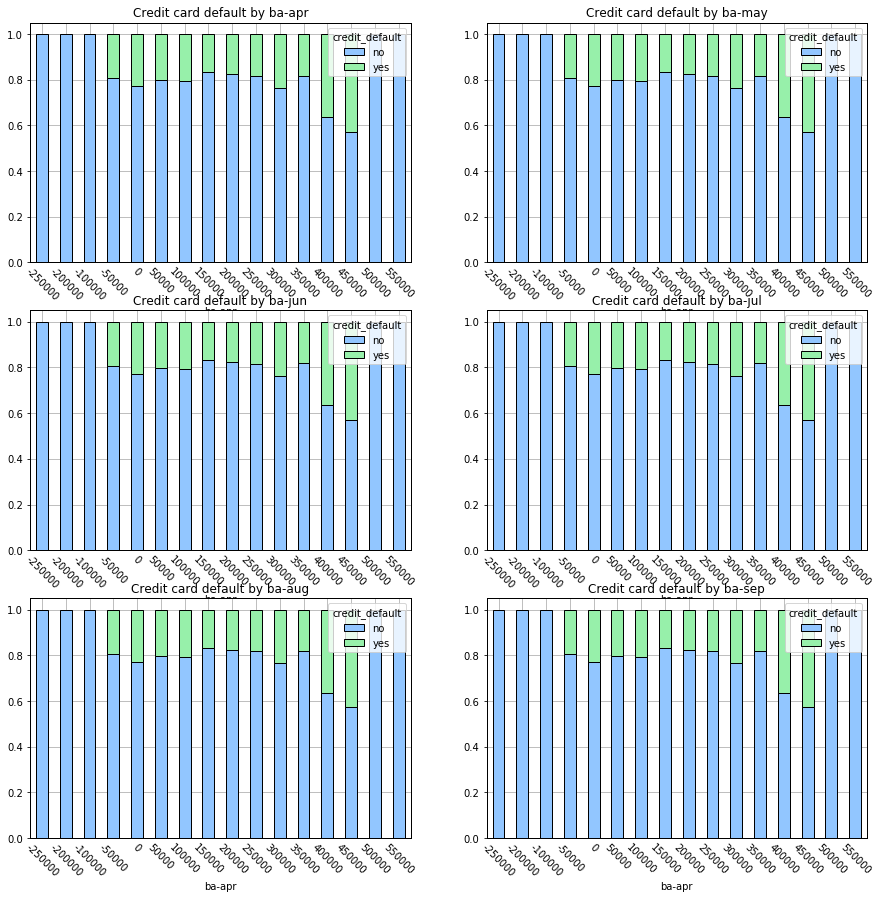

In [202]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

for i in range(0, len(ba_var)):
    x = i // fig_dims[1]
    y = i % fig_dims[1]
    sp = plt.subplot2grid(fig_dims, (x, y))
    ba_default_norm[0].plot(ax=sp, kind='bar', stacked=True, title='Credit card default by ' + ba_var[i], edgecolor='black')
    plt.xticks(rotation=-45)
    
plt.show()

Payment Amount
--------

In [62]:
pa_var = ['pa-apr', 'pa-may', 'pa-jun', 'pa-jul', 'pa-aug', 'pa-sep']
cc[pa_var].describe()

,pa-apr,pa-may,pa-jun,pa-jul,pa-aug,pa-sep
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,5480.147400,4734.702900,4719.769200,5131.898600,5.973676e+03,5651.344900
std,19361.411204,14912.375475,14483.407778,15416.402957,2.251175e+04,15835.839092
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,100.000000,200.000000,261.500000,390.000000,7.800000e+02,997.000000
50%,1500.000000,1500.000000,1500.000000,1800.000000,2.000000e+03,2081.500000
75%,4000.000000,4000.000000,4000.000000,4500.000000,5.000000e+03,5019.000000
max,528666.000000,417990.000000,292962.000000,417588.000000,1.227082e+06,493358.000000


In [63]:
pa_unique = []
for m in pa_var:
    val = cc[m].unique()
    val.sort()
    pa_unique.append([min(val), max(val)])
pa_unique

[[0, 528666], [0, 417990], [0, 292962], [0, 417588], [0, 1227082], [0, 493358]]

In [64]:
cc.isnull().sum()[pa_var]

pa-apr    0
pa-may    0
pa-jun    0
pa-jul    0
pa-aug    0
pa-sep    0
dtype: int64

In [65]:
pa_default = []

for m in pa_var:
    pa_default.append(pd.crosstab(cc[m]//50000*50, cc['credit_default']))
    
pa_default[4]

credit_default,no,yes
pa-aug,,
0,7633,2203
50,83,6
100,40,0
150,16,0
200,6,0
250,2,1
300,2,2
350,3,0
400,1,0


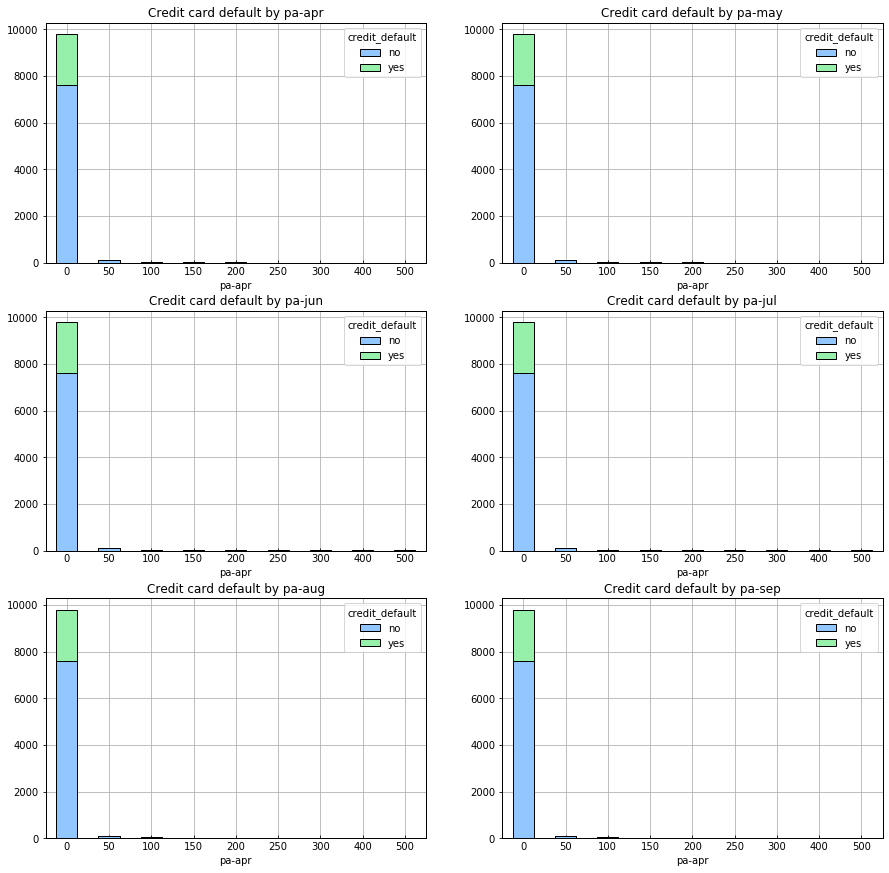

In [116]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

for i in range(0, len(pa_var)):
    x = i // fig_dims[1]
    y = i % fig_dims[1]
    sp = plt.subplot2grid(fig_dims, (x, y))
    pa_default[0].plot(ax=sp, kind='bar', stacked=True, title='Credit card default by ' + pa_var[i], edgecolor='black')
    plt.xticks(rotation=0)

plt.show()

In [67]:
pa_default_norm = []

for i in range(0, len(pa_var)):
    pa_default_norm.append(pa_default[i].div(pa_default[i].sum(1).astype(float), axis=0) )
    
pa_default_norm[1]

credit_default,no,yes
pa-may,,
0,0.776662,0.223338
50,0.931034,0.068966
100,0.857143,0.142857
150,1.000000,0.000000
200,1.000000,0.000000
250,1.000000,0.000000
300,1.000000,0.000000
400,1.000000,0.000000


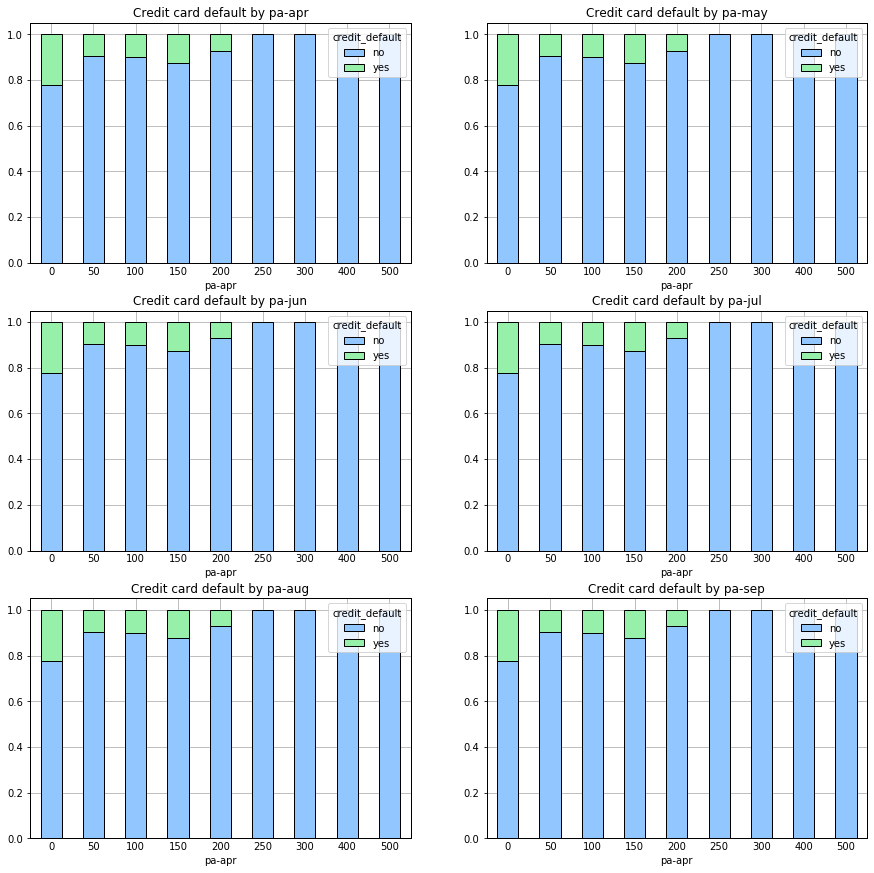

In [117]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

for i in range(0, len(pa_var)):
    x = i // fig_dims[1]
    y = i % fig_dims[1]
    sp = plt.subplot2grid(fig_dims, (x, y))
    pa_default_norm[0].plot(ax=sp, kind='bar', stacked=True, title='Credit card default by ' + pa_var[i], edgecolor='black')
    plt.xticks(rotation=0)
    
plt.show()

Correlation matrix
--------------------------

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]), <a list of 14 Text xticklabel objects>)

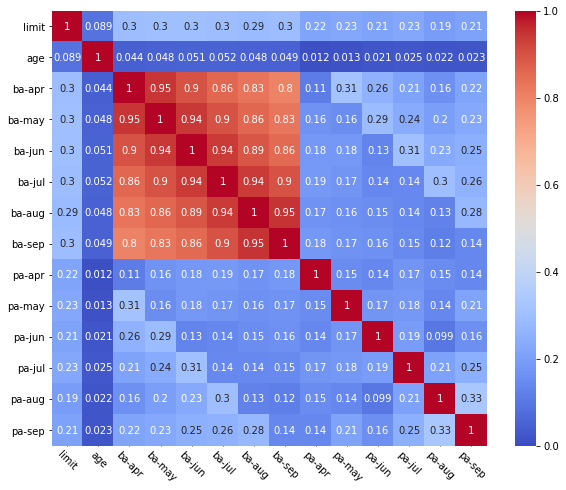

In [209]:
cont_var = ["limit","age"]+ba_var+pa_var

f, ax = plt.subplots(figsize=(10, 8))

corr = cc[cont_var].corr()

g = sns.heatmap(corr, cmap="coolwarm", vmin=0, vmax=1, annot=True, mask=np.zeros_like(corr, dtype=np.bool), square=True, ax=ax, edgecolor='black')
plt.xticks(rotation=315)

In [70]:
ba_df = cc[ba_var]
ba_df = ba_df.assign(mean=ba_df.mean(axis=1))
ba_df.head()

,ba-apr,ba-may,ba-jun,ba-jul,ba-aug,ba-sep,mean
0,30302,30358,49535,50760,49985,48966,43317.666667
1,7956,4616,6335,7843,9981,10755,7914.333333
2,29047,29731,30496,30206,29280,30057,29802.833333
3,23783,26855,25224,42823,41717,56426,36138.000000
4,52773,49601,48738,47632,48716,47987,49241.166667


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text yticklabel objects>)

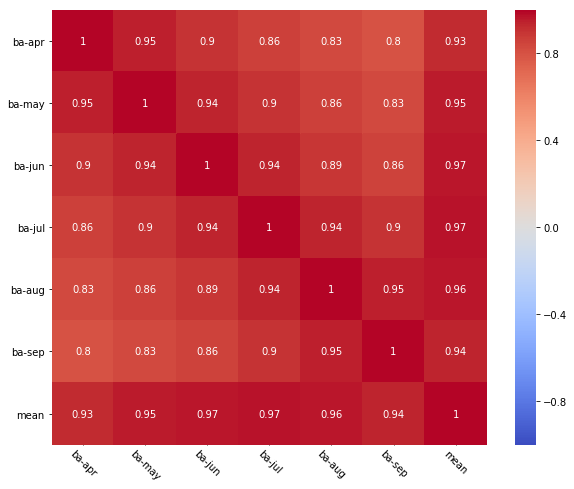

In [211]:
f, ax = plt.subplots(figsize=(10, 8))
corr = ba_df.corr()
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True, mask=np.zeros_like(corr, dtype=np.bool), square=True, ax=ax)
plt.xticks(rotation=315)
plt.yticks(rotation=0)

Data quality
------------

In [72]:
#cc['pa-apr'].describe()

In [73]:
#len(cc[cc['limit'] > 240000])

In [74]:
#boxplot = cc.boxplot(column=['pa-apr'])

Variable transformation
------------

In [75]:
cc_clean = cc

if ba_var[0] in cc_clean.columns:
    cc_clean = cc_clean.assign(ba_mean=cc_clean[ba_var].mean(axis=1))
    cc_clean = cc_clean.drop(columns=ba_var)

cc_clean.head()

,limit,sex,education,status,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,ps-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,credit_default,ba_mean
0,50000,male,graduate school,NaN,25,2,0,0,0,0,0,2130,1905,1811,1100,1100,1200,no,43317.666667
1,200000,male,university,married,54,-1,-1,-1,-1,-1,-1,10120,7852,6336,4622,7956,5499,no,7914.333333
2,30000,female,high school,married,-1,2,3,2,2,2,0,0,1700,1100,3,1053,1303,no,29802.833333
3,140000,female,university,single,-1,0,0,0,0,0,0,2000,2000,900,2000,10000,5000,no,36138.000000
4,60000,female,high school,married,36,1,2,2,0,0,0,1788,0,1894,1801,3997,0,yes,49241.166667
